# Read daily Coronavirus case data from remote source
## infer schema, save as a table, and perform simple SQL analysis
## train a neural network to predict future infection rate based on previous N days data
### source (updated daily): https://covid.ourworldindata.org/data/ecdc/new_cases.csv

### 1. import csv file to local directory from url

In [3]:
import urllib.request
local_filename = "/tmp/raw_csv.csv"
urllib.request.urlretrieve("https://covid.ourworldindata.org/data/ecdc/new_cases.csv",local_filename)
dbutils.fs.mv("file:" + local_filename,"dbfs:" + local_filename)


Out[1]: True

### 2. Create dataframe, infer schema, replace NaNs with zeros, and display in table format

In [5]:
df = spark.read.load(local_filename, format="csv", sep=",", inferSchema="true", header="true")
df = df.fillna(value=0)
display(df)

date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Mariana Islands,Norway,Oman,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
2019-12-31T00:00:00.000+0000,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-01T00:00:00.000+0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02T00:00:00.000+0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03T00:00:00.000+0000,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04T00:00:00.000+0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 3. Create a temporary table view

In [7]:
df.createOrReplaceTempView("RawCSV_view")

### 4. Plot global total daily cases
#### (schema-inferred timestamp datatype needs to be converted to readable date)

In [9]:
%sql
SELECT FROM_UNIXTIME(cast(date as bigint)) as DATE, WORLD AS `TOTAL GLOBAL CASES`
FROM RawCSV_view
WHERE WORLD IS NOT NULL

DATE,TOTAL GLOBAL CASES
2019-12-31 00:00:00,27
2020-01-01 00:00:00,0
2020-01-02 00:00:00,0
2020-01-03 00:00:00,17
2020-01-04 00:00:00,0
2020-01-05 00:00:00,15
2020-01-06 00:00:00,0
2020-01-07 00:00:00,0
2020-01-08 00:00:00,0
2020-01-09 00:00:00,0


### 5. Create training dataset
#### (Previous N days infection + integer to denote day of the week - 0 = Monday, 1 = Tuesday etc)
#### *Day of the week not yet implimented*

In [11]:
# can this be speeded up with caching and partioning?
import numpy as np
column_names = df.columns
N_columns = len(column_names)

# specify how many days of case numbers to train on
Mem_len = 10 # "memory length"

# loop over column names
# skip date and wolrd columns
X = [] # "data"
Y = [] # "label"
for ii in range(2,N_columns):
  
  column_vals = [int(row[column_names[ii]]) for row in df.collect()]
  
  #loop over daily case number for each country/column
  for jj in range(0,len(column_vals)-Mem_len):
    if np.max(column_vals[jj:jj+Mem_len])>0:
      X.append(column_vals[jj:jj+Mem_len])
      Y.append(column_vals[jj+Mem_len])

  


### 6. Randomly split 80:20 into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
# explict conversion to numpy array seems necessary
X_train, X_test, Y_train, Y_test = train_test_split(np.asarray(X,dtype = 'float'), np.asarray(Y,dtype = 'float'), test_size=0.2, random_state=42)

### 7. Define neural network architecture

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import ModelCheckpoint

initializer = 'glorot_uniform'
model = Sequential()
model.add(Dense(32, input_dim=Mem_len, activation='relu',kernel_initializer=initializer)) # input_dim = #variables

model.add(Dense(16, activation='relu',kernel_initializer=initializer)) # 8 neurons

model.add(Dense(1, activation='linear',kernel_initializer=initializer))

# Compile model
checkpoint = ModelCheckpoint("Checkpoint.h5", monitor='acc', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='min')
ADAM = optimizers.adam(lr=0.00005)

callbacks_list = [checkpoint]

model.compile(loss='mean_squared_error', optimizer=ADAM, metrics=['mae'])

Using TensorFlow backend.
WARNING:tensorflow:From /databricks/python/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.

### 8. Train neural network using training dataset

In [17]:
# takes around two mins to run
history = model.fit(X_train, Y_train, epochs=200, batch_size=64, callbacks=callbacks_list)

scores = model.evaluate(X_test, Y_test)

WARNING:tensorflow:From /databricks/python/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200

 64/27201 [..............................] - ETA: 4:04 - loss: 392355.2188 - mean_absolute_error: 138.3873
 1536/27201 [>.............................] - ETA: 10s - loss: 2031890.4493 - mean_absolute_error: 237.1891
 3392/27201 [==>...........................] - ETA: 4s - loss: 3363353.0197 - mean_absolute_error: 288.5667 
 5568/27201 [=====>........................] - ETA: 2s - loss: 4153802.5399 - mean_absolute_error: 300.3798
 7744/27201 [=======>......................] - ETA: 1s - loss: 3625629.0971 - mean_absolute_error: 280.5184
 9920/27201 [=========>....................] - ETA: 1s - loss: 3035868.8598 - mean_absolute_error: 257.8408
11904/27201 [============>.................] - ETA: 1s - loss: 2828211.6078 - mean_absolute_error: 251.2336
14080/27201 [==============>...............] - ETA: 0s - loss: 2869785.0407 - mean_absolute_error: 251.1564
16256/27201 [================>.............] - ETA: 0s - loss: 2976588.0716 - mean_absolute_error: 253.1573
18432/27201 [===================>..........] - ETA: 0s - loss: 2696048.0213 - mean_absolute_error: 242.9293
20416/27201 [=====================>........] - ETA: 0s - loss: 2699043.4757 - mean_absolute_error: 244.1663
22656/27201 [=======================>......] - ETA: 0s - loss: 2681419.2777 - mean_absolute_error: 241.9341
24192/27201 [=========================>....] - ETA: 0s - loss: 2566915.2295 - mean_absolute_error: 238.4645
26176/27201 [===========================>..] - ETA: 0s - loss: 2697030.1880 - mean_absolute_error: 241.0457
27201/27201 [==============================] - 1s 46us/step - loss: 2650076.2812 - mean_absolute_error: 240.4719
/databricks/python/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with acc available, skipping.
 'skipping.' % (self.monitor), RuntimeWarning)
Epoch 2/200

 64/27201 [..............................] - ETA: 1s - loss: 517626.8125 - mean_absolute_error: 194.0566
 2304/27201 [=>............................] - ETA: 0s - loss: 1961794.1862 - mean_absolute_error: 233.5283
 4352/27201 [===>..........................] - ETA: 0s - loss: 2003363.4715 - mean_absolute_error: 226.1410
 6528/27201 [======>.......................] - ETA: 0s - loss: 2339830.4217 - mean_absolute_error: 240.1970
 8704/27201 [========>.....................] - ETA: 0s - loss: 2291787.9869 - mean_absolute_error: 239.6695
10880/27201 [==========>...................] - ETA: 0s - loss: 2470039.5651 - mean_absolute_error: 237.7598
13056/27201 [=============>................] - ETA: 0s - loss: 2383261.9720 - mean_absolute_error: 235.2425
15232/27201 [===============>..............] - ETA: 0s - loss: 2348723.6322 - mean_absolute_error: 227.3838
17408/27201 [==================>...........] - ETA: 0s - loss: 2430323.4608 - mean_absolute_error: 226.5593
19584/27201 [====================>.........] - ETA: 0s - loss: 2416004.8031 - mean_absolute_error: 226.6776
21760/27201 [======================>.......] - ETA: 0s - loss: 2464356.2801 - mean_absolute_error: 229.6514
23936/27201 [=========================>....] - ETA: 0s - loss: 2394588.9860 - mean_absolute_error: 226.2645
25984/27201 [===========================>..] - ETA: 0s - loss: 2303867.8144 - mean_absolute_error: 223.6533
27201/27201 [==============================] - 1s 24us/step - loss: 2273496.9520 - mean_absolute_error: 223.4405
Epoch 3/200

 64/27201 [..............................] - ETA: 0s - loss: 1042405.0000 - mean_absolute_error: 293.7463
 2304/27201 [=>............................] - ETA: 0s - loss: 571474.3783 - mean_absolute_error: 174.8149 
 4544/27201 [====>.........................] - ETA: 0s - loss: 1188723.4377 - mean_absolute_error: 182.9964
 6656/27201 [======>.......................] - ET

#### 9. Predict next day case numbers fromt testing set
1. The trained network
2. Just the previous days case number
3. A random number selected from the previous N days case numbers
4. A random number in a interval set by maximum and minimum case numbers from the previous N days

In [19]:
import random
print('Trained network MAE: ' + str(np.round(scores[1],2)))

# Same as yesterday
SaY = np.mean(np.abs(X_test[:,-1] - Y_test))
print('Same as yesterday MAE: ' + str(np.round(SaY,2)))

# Random choice from previous N days
abs_vals_choice = []
abs_vals_interval = []

for ii in range(0,len(Y_test)):
  abs_vals_interval.append(np.abs(random.randint(np.min(X_test[ii,:]),np.amax(X_test[ii,:]))-Y_test[ii]))
  abs_vals_choice.append(np.abs(random.choice(X_test[ii,:])-Y_test[ii]))
  
  
print('Random choice from previous N days MAE: ' + str(np.round(np.mean(abs_vals_choice),2)))
print('Random in range from previous N days MAE: ' + str(np.round(np.mean(abs_vals_interval),2)))


Trained network MAE: 125.17
Same as yesterday MAE: 158.11
Random choice from previous N days MAE: 205.74
Random in range from previous N days MAE: 223.97

### 10. Use prediction from day N+1 to predict for day N+2. 
#### (i.e. apply trained network recursively, starting from genuine case numbers)

In [21]:
Country = 'Malta'
Test_all = [int(row[Country]) for row in df.collect()]
Test_cases_0 = Test_all[-Mem_len:]
Test_cases_0 = [float(x) for x in Test_cases_0]

Test_cases = np.reshape(Test_cases_0,(1,Mem_len))

next_set = np.copy(Test_cases)
predictions = []
extra_days = 14
for ii in range(0,extra_days):
    next_day = model.predict(next_set)
    #print(next_day)
    predictions.append(next_day[0])
    next_set = np.append(next_set[0][1:Mem_len],next_day)
    next_set = np.reshape(next_set,(1,Mem_len))




### 11. Plot results of recursive test

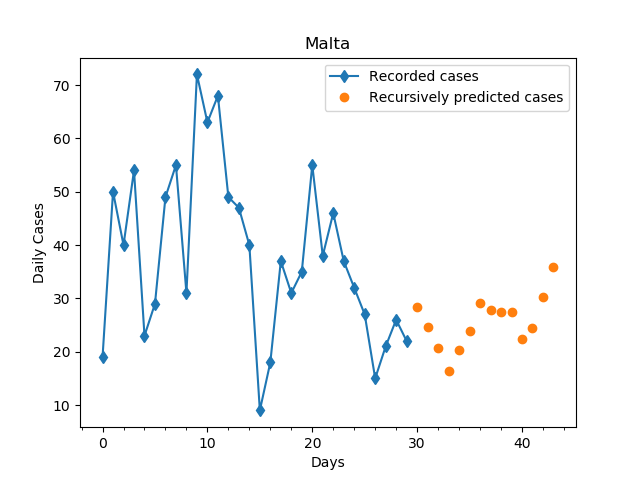

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

N_days = 30 # plot previous 30 days and predicted next "extra days of cases"
fig, ax = plt.subplots()
ax.plot(np.arange(0,N_days,1),Test_all[-N_days:],'-d')
ax.plot(np.arange(N_days,extra_days+N_days,1),predictions,'o')
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.ylabel('Daily Cases')
plt.xlabel('Days')
plt.title(Country)
ax.legend(('Recorded cases','Recursively predicted cases'))
display(fig)


In [24]:
print('Next day prediction: ' + str(int(np.round(predictions[0]))) + ' cases')

Next day prediction: 28 cases

### Things to do
1. Does encoding day of the week in the training improve performance?
2. Connect to an AWS instance (probably need a paid Databricks account)
3. Can dataset generation time be decreased with partitioning etc?